In [ ]:
!nvidia-smi

Thu Nov 10 02:22:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tokenizer
!pip install transformers
!pip install pyunpack
!pip install patool
from pyunpack import Archive
from zipfile import ZipFile
import shutil
#as an aware datetime
from datetime import datetime, timezone
#or from pytz database
import pytz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 7.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 32.6 MB/s 
     |████████████████████████████████| 163 kB 62.5 MB/s 
     |████████████████████████████████| 7.6 MB 73.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 6.0 MB/s 


DOWNLOAD THE DATASET WITH ID

In [ ]:
# !gdown 1JBzZhED3nieqPjEqSpCq77-5CY10Qopr

In [ ]:
!cp "/content/drive/MyDrive/Transformer-text generation-Thien-Trung-Kiet/dataset.rar" "./"

**IGNOR** IF ALREADY HAVE TOKENIZED_DATA FOLDER

In [ ]:
import os
from tokenizers.models import BPE
from tokenizers import Tokenizer
from tokenizers.decoders import ByteLevel as ByteLevelDecoder
from tokenizers.normalizers import NFKC, Sequence
from tokenizers.pre_tokenizers import ByteLevel
from tokenizers.trainers import BpeTrainer

In [ ]:
class BPE_token(object):
    def __init__(self):
        self.tokenizer = Tokenizer(BPE())
        self.tokenizer.normalizer = Sequence([
            NFKC()
        ])
        self.tokenizer.pre_tokenizer = ByteLevel()
        self.tokenizer.decoder = ByteLevelDecoder()

    def bpe_train(self, paths):
        trainer = BpeTrainer(vocab_size=50257, show_progress=True,min_frequency=2, inital_alphabet=ByteLevel.alphabet(), special_tokens=[
            "<s>",
            "<pad>",
            "</s>",
            "<unk>",
            "<mask>"
        ])
        self.tokenizer.train(trainer=trainer, files=paths)

    def save_tokenizer(self, location, prefix=None):
        if not os.path.exists(location):
            os.makedirs(location)
        self.tokenizer.model.save(location, prefix)

In [ ]:
from pathlib import Path
# the folder 'text' contains all the files
paths = [str(x) for x in Path("./dataset").glob("**/*.txt")]
tokenizer = BPE_token()
# train the tokenizer model
tokenizer.bpe_train(paths)
# saving the tokenized data in our specified folder 
save_path = 'tokenized_data'
tokenizer.save_tokenizer(save_path)

In [ ]:
!zip -r './tokenized_data.zip' './tokenized_data'

In [ ]:
!cp './tokenized_data.zip' "/content/drive/MyDrive/Transformer-text generation-Thien-Trung-Kiet/tokenized_data/"

LOAD TOKEN FROM SAVE PATH

In [ ]:
import tensorflow as tf
from transformers import GPT2Config, TFGPT2LMHeadModel, GPT2Tokenizer
# loading tokenizer from the saved model path
tokenizer = GPT2Tokenizer.from_pretrained('/content/drive/MyDrive/Transformer-text generation-Thien-Trung-Kiet/tokenized_data/')
# tokenizer = GPT2Tokenizer.from_pretrained('./tokenized_data/')

tokenizer.add_special_tokens({
  "eos_token": "</s>",
  "bos_token": "<s>",
  "unk_token": "<unk>",
  "pad_token": "<pad>",
  "mask_token": "<mask>"
})
# creating the configurations from which the model can be made
config = GPT2Config(
  vocab_size=tokenizer.vocab_size,
  bos_token_id=tokenizer.bos_token_id,
  eos_token_id=tokenizer.eos_token_id,
  # n_embd= 768,
  # n_head = 12,
  # n_layer = 12
)

# config = GPT2Config(
#   vocab_size=tokenizer.vocab_size,
#   bos_token_id=tokenizer.bos_token_id,
#   eos_token_id=tokenizer.eos_token_id,
#   n_embd= 1024,
#   n_head = 16,
#   n_layer = 24
# )
# creating the model
model = TFGPT2LMHeadModel(config)

EXTRACT DATASET

In [ ]:
Archive('./dataset.rar').extractall('./')

In [ ]:
from pathlib import Path
paths = [str(x) for x in Path("./dataset").glob("**/*.txt")]

**IGNOR** IF ALREADY HAVE TOKENSTRING.txt SAVE(RUN IF THE DATASET ISN'T RUN FOR THE FIRST TIME)

In [ ]:
single_string = ''
for filename in paths:
  with open(filename, "r", encoding='utf-8') as f:
   x = f.read()
  single_string += x + tokenizer.eos_token

In [ ]:
single_string = ''
with open(filename, "r", encoding='utf-8') as f:
  x = f.read()
  single_string += x + tokenizer.eos_token

In [ ]:
string_tokenized = tokenizer.encode(single_string)

In [ ]:
import json
with open("string_tokenized.txt", "w") as f:
  f.write(json.dumps(string_tokenized))
  f.close()

In [ ]:
!cp string_tokenized.txt "/content/drive/MyDrive/Transformer-text generation-Thien-Trung-Kiet/tokenized_data/"

*DO* NOT IGNOR IF ALREADY HAVE TOKENSTRING

In [ ]:
import json
string_tokenized = ''
# get the tokenString from drive
!cp '/content/drive/MyDrive/Transformer-text generation-Thien-Trung-Kiet/tokenized_data/string_tokenized.txt' string_tokenized.txt
with open('string_tokenized.txt', 'r') as f:
    a = json.loads(f.read())
    string_tokenized = a

In the neural network terminology:

*   one epoch = one forward pass and one backward pass of all the training examples
*   batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
*   number of iterations = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

80% for training 10% for eval 10% for test

In [ ]:
examples = []
block_size = 100
# 16-24
BATCH_SIZE = 24

BUFFER_SIZE = len(paths)
for i in range(0, len(string_tokenized) - block_size + 1, block_size):
  examples.append(string_tokenized[i:i + block_size])
inputs, labels = [], []
for ex in examples:
  inputs.append(ex[:-1])
  labels.append(ex[1:])

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((inputs, labels))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
full_ds_size = len(dataset)
train_ds_size = int(0.80 * full_ds_size)
valid_ds_size = int(0.10 * full_ds_size)

train_ds = dataset.take(train_ds_size)
remaining = dataset.skip(train_ds_size)  
valid_ds = remaining.take(valid_ds_size)
test_ds = remaining.skip(valid_ds_size)

In [ ]:
# # Prepare the validation dataset
# val_dataset = tf.data.Dataset.from_tensor_slices((inputs_validate, labels_validate))
# val_dataset = val_dataset.batch(BATCH_SIZE)
# # model.fit(train_dataset, epochs=3, validation_data=val_dataset)


# def is_test(x, _):
#     return x % 4 == 0
# def is_train(x, y):
#     return not is_test(x, y)
# recover = lambda x, y: y
# # Split the dataset for training.
# test_dataset = dataset.enumerate().filter(is_test).map(recover)

# # Split the dataset for testing/validation.
# train_dataset = dataset.enumerate().filter(is_train).map(recover)

RUN THE OPTIMIZER AND COMPILE THE MODEL(IF RESUME THE TRAINING ONLY LOOSE optimizer states WHICH MEAN THE TRAINING WILL SUFFER AT FIRST)


*   **Larger learning rate** mean that the weights are changed more every iteration, so that they may reach their optimal value faster, but may also miss the exact optimum.


*   **Smaller learning rate** mean that the weights are changed less every iteration, so it may take longer time to reach their optimal value, but they are less likely to miss optima of the loss function.



In [ ]:
# defining our optimizer
# learning rate should do 3e-5 or default value 0.001
# or should use (0.001, 0.9, 0.999, 10^-8) for (learning_rate, beta1, beta2, epsilon).
# Learning rates 0.0005, 0.001, 0.00146 performed best or 10^-3 to 10^-5
# optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=1e-8, clipnorm=1.0)

# definining our loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# defining our metric which we want to observe
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
# compiling the model
model.compile(optimizer=optimizer, loss=[loss, *[None] * model.config.n_layer], metrics=[metric])

SETUP CHECKPOINT

In [ ]:
import os
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

DOWNLOAD CHECKPOINT IF ALREADY HAVE (REMEMBER TO SHARE THE CHECKPOINT IN DRIVE)

---



In [ ]:
!mkdir training
# download checkpoint
!gdown --id 105ad4j4t2-iqz4i7Js3vSnCmHnE1ELdB
!unzip './12-11|02-36.zip' -d './training'

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=105ad4j4t2-iqz4i7Js3vSnCmHnE1ELdB
To: /content/12-11|02-36.zip
100% 1.16G/1.16G [00:06<00:00, 173MB/s]
Archive:  ./12-11|02-36.zip
  inflating: ./training/cp.ckpt.index  
  inflating: ./training/cp.ckpt.data-00000-of-00001  
  inflating: ./training/checkpoint   


In [ ]:
# download history
try:
  shutil.copy('/content/drive/MyDrive/Transformer-text generation-Thien-Trung-Kiet/history1.npy', "./")
except:
  print('cant download')

In [ ]:
# Loads the weights OF THE CHECKPOINT 
model.load_weights(checkpoint_path)

SETUP CALLBACK

In [ ]:
import tensorflow as tf
from tensorflow import keras
import shutil
#as an aware datetime
from datetime import datetime, timezone
import numpy as np
import matplotlib.pyplot as plt

#or from pytz database
import pytz
class CustomCallback(keras.callbacks.Callback):
  def __init__(self, patience=0):
    # download history
    super(CustomCallback, self).__init__()
    try:
      history1=np.load('history1.npy',allow_pickle='TRUE').item()
      self.history = {
        'loss': history1['loss'],
        'accuracy': history1['accuracy'],
        'val_loss': history1['val_loss'],
        'val_accuracy': history1['val_accuracy']
      }
    except : 
      self.history = {'loss': [],'accuracy': [],'val_loss': [],'val_accuracy': []}

  def on_epoch_end(self, epoch, logs={}):
    self.history['loss'].append(logs.get('loss'))
    self.history['accuracy'].append(logs.get('accuracy'))
    self.history['val_loss'].append(logs.get('val_loss'))
    self.history['val_accuracy'].append(logs.get('val_accuracy'))
    np.save('history1.npy',self.history)
    try:
      os.remove('/content/drive/MyDrive/Transformer-text generation-Thien-Trung-Kiet/history1.npy')
    except:
      print("doesn't have history")
    shutil.copy('./history1.npy', "/content/drive/MyDrive/Transformer-text generation-Thien-Trung-Kiet/")
    tz = pytz.timezone('Asia/Bangkok')
    Asia_now = datetime.now(tz).strftime("%d-%m|%H-%M")
    print("saving to drive!")
    shutil.make_archive(Asia_now, 'zip', './training/')
    location = './' + Asia_now + ".zip"
    print("copy file to driver: "+location)
    shutil.copy(location, "/content/drive/MyDrive/Transformer-text generation-Thien-Trung-Kiet/training-checkpoint/")

In [ ]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
#create callback on save
callbacks = [cp_callback, CustomCallback()]

// run this on your Chrome / Browser Console (where Colab is present)

function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}

var colab = setInterval(ConnectButton,40000);

//clearInterval(colab)

**BEGIN TRAINING (ACCURACY MUST BETWEEN 70% AND 90%)**

> epoch: 100+ loss: 1.0084 - accuracy: 0.7279

> 0.55% each epoch on learning rate 3e-5 0.0434 on loss

> 0.49% each epoch on learning rate 0.001 0.0397 on loss

https://stats.stackexchange.com/questions/160902/is-it-possible-for-test-error-to-be-lower-than-training-error


In [ ]:
# Train the model with the new callback
# number of epoch need to be run.
num_epoch = 15
history = model.fit(train_ds,validation_data=valid_ds, epochs=num_epoch,shuffle=True,callbacks=callbacks)  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.


Epoch 1/15
6348/6348 [==============================] - ETA: 0s - loss: 1.3606 - accuracy: 0.6648
Epoch 1: saving model to training/cp.ckpt
saving to drive!
copy file to driver: ./11-11|13-38.zip
6348/6348 [==============================] - 4257s 667ms/step - loss: 1.3606 - accuracy: 0.6648 - val_loss: 1.1411 - val_accuracy: 0.7243
Epoch 2/15
6348/6348 [==============================] - ETA: 0s - loss: 1.3751 - accuracy: 0.6618
Epoch 2: saving model to training/cp.ckpt
saving to drive!
copy file to driver: ./11-11|14-48.zip
6348/6348 [==============================] - 4242s 668ms/step - loss: 1.3751 - accuracy: 0.6618 - val_loss: 1.1256 - val_accuracy: 0.7290
Epoch 3/15
6348/6348 [==============================] - ETA: 0s - loss: 1.3592 - accuracy: 0.6669
Epoch 3: saving model to training/cp.ckpt
saving to drive!
copy file to driver: ./11-11|15-59.zip
6348/6348 [==============================] - 4243s 668ms/step - loss: 1.3592 - accuracy: 0.6669 - val_loss: 1.1335 - val_accuracy: 0.728

In [ ]:
history.history

NameError: ignored

In [ ]:
history1=np.load('history1.npy',allow_pickle='TRUE').item()
print(history1)
loss_train = history1['loss']
loss_val = history1['val_loss']
accuracy_train =history1['accuracy']
accuracy_val =history1['val_accuracy']


{'loss': [2.662910223007202, 2.6887857913970947, 2.656451940536499, 2.6020522117614746, 2.5724432468414307, 2.5587663650512695, 2.5316033363342285, 2.4821674823760986, 2.423698902130127, 2.378497838973999, 2.3318939208984375, 2.2949843406677246, 2.294154405593872, 2.2480885982513428, 2.2552905082702637, 2.3411812782287598, 2.248542308807373, 2.2018580436706543, 2.1729929447174072, 2.1480093002319336, 2.133444309234619, 2.110597848892212, 2.0970098972320557, 2.088510513305664, 2.055943012237549, 2.0360491275787354, 2.024676561355591, 2.0185909271240234, 1.9910492897033691, 1.9771721363067627, 1.9627896547317505, 1.969815731048584, 1.9723762273788452, 1.9682587385177612, 1.9583195447921753, 1.9351048469543457, 1.9119126796722412, 1.8827894926071167, 1.8811284303665161, 1.8734325170516968, 1.9011485576629639, 1.8540163040161133, 1.8468085527420044, 1.826599359512329, 1.809876799583435, 1.8006597757339478, 1.798675298690796, 1.7866531610488892, 1.8057539463043213, 1.8120392560958862, 1.803

110


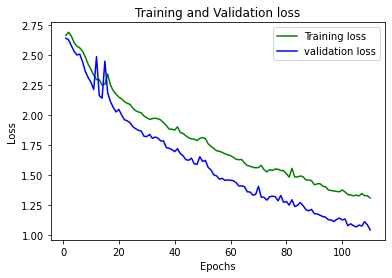

In [ ]:
epochs = range(1,len(accuracy_train)+1)
print(len(accuracy_train))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

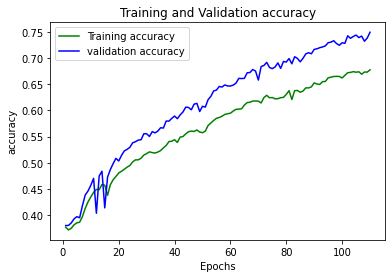

In [ ]:
epochs = range(1,len(accuracy_train)+1)

plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

TEST MODEL

In [3]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained('NlpHUST/gpt2-vietnamese')
model = GPT2LMHeadModel.from_pretrained('NlpHUST/gpt2-vietnamese')

Downloading:   0%|          | 0.00/854k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/512k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/215 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/884 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/510M [00:00<?, ?B/s]

In [21]:
text = "Tổng thống ca ngợi"
# encoding the input text
input_ids = tokenizer.encode(text, return_tensors='tf')

In [22]:
output = model.generate(
    input_ids,
    pad_token_id=50256,
    num_beams=5, 
    early_stopping=True,
    max_length=50,
    no_repeat_ngram_size=2,
    num_return_sequences=2)

ValueError: ignored

In [18]:
for i, sample_output in enumerate(output):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(output[i],skip_special_tokens=True)))
    print('\n---')

>> Generated text 1

Tổng thống ca ngợi Tổng Bí thư Nguyễn Phú Trọng là một nhà lãnh đạo có tầm nhìn xa trông rộng, có trách nhiệm với đất nước, dân tộc và nhân dân.
Tổng bí thư đánh giá cao những thành tựu to lớn, toàn diện

---
>> Generated text 2

Tổng thống ca ngợi Tổng Bí thư Nguyễn Phú Trọng là một nhà lãnh đạo có tầm nhìn xa trông rộng, có trách nhiệm với đất nước, dân tộc và nhân dân.
Tổng bí thư đánh giá cao những đóng góp to lớn của ông Nguyễn

---


In [ ]:
text = "Tổng thống ca ngợi"
# encoding the input text
input_ids = tokenizer.encode(text, return_tensors='tf')
# getting out output
# beam_output = model.generate(
#   input_ids,
#   max_length = 50,
#   num_beams = 5,
#   temperature = 0.7,
#   no_repeat_ngram_size=2,
#   num_return_sequences=5
# )
# beam_output = model.generate(
#   input_ids,
#   pad_token_id=tokenizer.eos_token_id,
#   do_sample=True,
#   min_length= 50,
#   max_length = 50,
#   num_beams = 5,
#   top_k=40,
#   early_stopping=True,
#   temperature = 0.7,
#   no_repeat_ngram_size=2,
#   num_return_sequences=1
# )



In [ ]:
tokenizer.decode(greedy_output)

In [ ]:
greedy_output = model.generate(
    input_ids,
    pad_token_id=tokenizer.eos_token_id,
    num_beams=5, 
    early_stopping=True,
    max_length=50,
    no_repeat_ngram_size=2,
    num_return_sequences=2)

In [13]:
# print(tokenizer.decode(beam_output[0], skip_special_tokens=True))
for i, sample_output in enumerate(greedy_output):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(greedy_output[i],skip_special_tokens=True)))
    print('\n---')

>> Generated text 1

Tổng thống ca ngợi Tổng Bí thư Nguyễn Phú Trọng là một nhà lãnh đạo có tầm nhìn xa trông rộng, có trách nhiệm với đất nước, dân tộc và nhân dân.
Tổng bí thư đánh giá cao những thành tựu to lớn, toàn diện

---
>> Generated text 2

Tổng thống ca ngợi Tổng Bí thư Nguyễn Phú Trọng là một nhà lãnh đạo có tầm nhìn xa trông rộng, có trách nhiệm với đất nước, dân tộc và nhân dân.
Tổng bí thư đánh giá cao những đóng góp to lớn của ông Nguyễn

---


In [ ]:
# saving the model in tensorflow format
model.save('./MyModel_tf',save_format='tf')


# loading the saved model
# loaded_model = tf.keras.models.load_model('./MyModel_tf')

# retraining the model
# loaded_model.fit(x_train, y_train, epochs = 10, validation_data = (x_test,y_test),verbose=1)


In [ ]:
!zip -r ./MyModel_tf.zip ./MyModel_tf/

In [ ]:
!cp ./MyModel_tf.zip '/content/drive/MyDrive/Transformer-text generation-Thien-Trung-Kiet/'

**MANUALLY SAVE TO DRIVE**

In [ ]:
import shutil
#as an aware datetime
from datetime import datetime, timezone
#or from pytz database
import pytz
tz = pytz.timezone('Asia/Bangkok')
Asia_now = datetime.now(tz).strftime("%d-%m|%H-%M")
print("saving to drive!")
shutil.make_archive(Asia_now, 'zip', './training/')
location = './' + Asia_now + ".zip"
print("copy file to driver: "+location)
shutil.copy(location, "/content/drive/MyDrive/Transformer-text generation-Thien-Trung-Kiet/training-checkpoint/")

Evaluate model(**DO NOT RUN** IF HAVE LARGE AMOUNT OF DATASET, TO LARGE TO PROCESS AND IT'LL TAKE TOO LONG)

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_ds, batch_size=512)
print("test loss, test acc:", results)

Evaluate on test data
 13/795 [..............................] - ETA: 2:09:28 - loss: 1.0580 - accuracy: 0.7446

KeyboardInterrupt: ignored